Ajouter étude du temps de réaction

In [1]:
import math, random

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import seaborn as sns;

In [4]:
folderBack = True
if(folderBack):
        logfileDirectory = "LogFiles\\"
else:
    logfileDirectory = "Experience Fiabilité\\LogFile\\"
subjectName = "Perrine"
emotionnel = False
fileNameExtension = "ReponseStimuli"+"Emotionnel"*emotionnel+".txt"
logfileName = logfileDirectory+subjectName+fileNameExtension
logfileName

'LogFiles\\AnnickReponseStimuli.txt'

In [5]:
def webfrac(x=1,nb=5, k = 0.9):
    """
    Trouve une valeur Z tel que la weberFraction(x,y)=weberFraction(y,z)
    Valeur de référence : a distance de 15, il faut au moins une seconde distance de 18 pour differencier
    """
    
    
    res = [x]
    for i in range(nb-1):
        res.append(round(res[-1]*k+res[-1]))
    return res

In [6]:
dists = webfrac(5,5,k=0.7)
dists

[5, 8, 14, 24, 41]

In [7]:
logs= True

In [8]:
def convertDistanceAngleEnPosition(angle,distance, ecartDistance = 5, logs = False, dist = []):
    if(logs):
        r = dist[distance]
    else:
        r = distance*ecartDistance
    #Shift pour lisibilité : Pour la simulation 0° est devant 90° est a gauche
    angle = angle-90
    posX = r*math.cos(math.radians(angle))
    posY = r*math.sin(math.radians(angle))
    return (round(posX),round(posY))


In [9]:
def calculPositionDisponiblesmods(nombreAngle = 7,nombreDistance=4, espaceDistance = 5, logs = False, dist = dists):
    """Détermine l'ensemble des positions disponibles en fonctions du nombre d'angles et de cercles de positionnement accessible"""
    position = []
    deltaAngle = 180 / (nombreAngle - 1)
    if(logs):
        for d in range(0,len(dist)):
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d,logs=logs,dist=dist)
                position.append((round(x),round(y)))
    else:
        for d in range(1,nombreDistance+1):
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d)
                position.append((round(x),round(y)))
    return position

In [10]:
def calculPositionDisponibles(nombreAngle = 7,nombreDistance=5, espaceDistance = 5, logs = False, dist = dists, posDict = True):
    """Détermine l'ensemble des positions disponibles en fonctions du nombre d'angles et de cercles de positionnement accessible"""
    position = dict()
    positionGroupe = dict()
    deltaAngle = 180 / (nombreAngle - 1)
    if(logs):
        for d in range(0,len(dist)):
            position[d] = []
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d,logs=logs,dist=dist)
                if(posDict):
                    position[d].append((round(x),round(y)))
                else:
                    positionGroupe[str(x)+"_"+str(y)] = [d,int(angle)]
        
    else:
        for d in range(1,nombreDistance+1):
            position[d] = []
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d)
                if(posDict):
                    position[d].append((round(x),round(y)))
                else:
                    positionGroupe[str(x)+"_"+str(y)] = [d,int(angle)]
    if(posDict):
        return position
    else:
        return positionGroupe

In [11]:
def calculPositionDisponiblesSP(nombreAngle = 7,nombreDistance=4, espaceDistance = 5, logs = True, dist = [5, 8, 14, 24, 41],orderDist = True):
    """Détermine l'ensemble des positions disponibles en fonctions du nombre d'angles et de cercles de positionnement accessible"""
    position = []
    if(orderDist):
        position = dict()
    deltaAngle = 180 / (nombreAngle - 1)
    if(logs):
        for d in range(0,len(dist)):
            if(orderDist):
                position[d]=[]
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d,logs=logs,dist=dist)
                if(orderDist):
                    position[d].append((round(x),round(y)))
                else:
                    position.append((round(x),round(y)))
    else:
        for d in range(1,nombreDistance+1):
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d)
                position.append((round(x),round(y)))
    return position

In [12]:
def convertirPositionEnDistance(x,y,verbose = False):
    pos = calculPositionDisponibles(logs=logs,dist=dist)
    for d in pos.keys():
        for i,j in pos[d]:
            if(i == x and j == y):
                if(verbose):
                    print("Distance : "+str(d))
                return d
def convertirPositionEnDistance(string,verbose = False,logs=False,dist=[]):
    string= string.split("_")
    x=int(string[0])
    y=int(string[1])
    pos = calculPositionDisponibles(logs=logs,dist=dist)
    for d in pos.keys():
        for i,j in pos[d]:
            if(i == x and j == y):
                if(verbose):
                    print("Distance : "+str(d))
                return d
    return -1

In [13]:
def convertPositionEnAngleDistance(x,y):
    d = math.sqrt(x**2+y**2)#Calcul de distance ok a +- 1 
    cosrada = x/d
    sinrada = y/d
    radax = math.acos(cosrada)
    raday = math.asin(sinrada)
    ax = math.degrees(radax)
    ay = math.degrees(raday)
    #print(round(ax),round(ay))
    return round(ay),round(d)

In [14]:
verboseDetail = False
diagonales = False
deplacements = ["Approche Gauche","Approche","Approche Droite","Gauche","Aucun","Droite","Eloignement Gauche","Eloignement","Eloignement Droite"]
reponses = dict()
bonnesReponses = [0,0,0,0,0,0,0,0,0]
mauvaisesReponses = [0,0,0,0,0,0,0,0,0]
resultatsDistances = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
resultatsDistances2 = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
deplacementsDistance = [[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]]
certainty = []
logfile = open(logfileName,'r')
log = logfile.read()
trials = log.split("Fin")
for t in trials:
    dist = -1
    dist2 = -1
    lines = t.split("\n")
    reponseCorrecte = 0
    expected = -1
    rt = -1
    cert = -1
    rtcert = -1
    nTrial = -1
    posDistance = -1
    posCorrecte = -1
    p1 = -1
    p2 = -1
    pSelec = -1
    for i in lines:
        if("trial" in i): #Determine le n° de l'etape
            s = i.split(" ")
            nTrial = int(s[-1])
            if(verboseDetail):
                print("Etape "+s[-1])
        elif("Reponse" in i):#Etudie la réponse donnée
            sp = i.split(" ")
            inp = int(sp[1])
        elif("Mouvement" in i):
            sp = i.split(" ")
            expected = int(sp[1])
                
        elif("Position1" in i):#Détermine la position initiale
            pos1 = i.split(" ")[1]
            p1 = pos1.split("_")
            p1 = (int(p1[0]),int(p1[1]))
            a,dist = convertPositionEnAngleDistance(p1[0],p1[1]) 
        elif("Position2" in i):#Détermine la position initiale
            pos2 = i.split(" ")[1]
            p2 = pos2.split("_")
            p2 = (int(p2[0]),int(p2[1]))
            a,dist2 = convertPositionEnAngleDistance(p2[0],p2[1]) 
        elif("ReactionTime" in i):
            if("ReactionTimeCertainty" in i):
                rtcert = int(i.split(" ")[1])
            else:
                rt = int(i.split(" ")[1])
        elif("Certainty" in i):
                cert = int(i.split(" ")[1])
    d,a = calculPositionDisponibles(posDict = False,logs=True,dist=dists)[pos1]
    d2,a2 = calculPositionDisponibles(posDict = False,logs=True,dist=dists)[pos2]
    if(d not in reponses.keys()):
        reponses[d] = dict()
    if(a not in reponses[d].keys()):
        reponses[d][a] = dict()
    if(inp-1 <=9):
        reponses[d][a][deplacements[expected-1]] = dict()
        reponses[d][a][deplacements[expected-1]]["Reponse"] = inp
        reponses[d][a][deplacements[expected-1]]["idMouvement"] = expected
        reponses[d][a][deplacements[expected-1]]["ReactionTime"] = rt
        reponses[d][a][deplacements[expected-1]]["Numero"] = nTrial
        reponses[d][a][deplacements[expected-1]]["P1"] = p1
        reponses[d][a][deplacements[expected-1]]["P2"] = p2
        reponses[d][a][deplacements[expected-1]]["D1"] = dist
        reponses[d][a][deplacements[expected-1]]["D2"] = dist2
    if(cert != -1 and rtcert != -1):
        certainty.append((cert,rtcert))

In [15]:
def analyseLienDistanceReponse(rep):
    dist1 = dict()
    for d in rep.keys():
        dist1[d]=[]
        for a in rep[d]:
            for mvm in rep[d][a]:                
                idm = rep[d][a][mvm]["idMouvement"]
                r = rep[d][a][mvm]["Reponse"]
                dist1[d].append(r)
    #print(dist1)
    for i in dist1.keys():
        s=0
        l = len(dist1[i])
        for j in dist1[i]:
            s = s+abs(dist1[i][j])
        dist1[i]=s/l
        
    return dist1
ldr = analyseLienDistanceReponse(reponses)
for i in range(0,5):
    print(str(i)+":"+str(ldr[i]))

0:2.838709677419355
1:2.6
2:2.16
3:2.8
4:2.032258064516129


In [16]:
reponses

{2: {90: {'Eloignement Droite': {'Reponse': 0,
    'idMouvement': 9,
    'ReactionTime': 5195,
    'Numero': 1,
    'P1': (14, 0),
    'P2': (21, -12),
    'D1': 14,
    'D2': 24},
   'Eloignement': {'Reponse': 2,
    'idMouvement': 8,
    'ReactionTime': 4995,
    'Numero': 4,
    'P1': (14, 0),
    'P2': (24, 0),
    'D1': 14,
    'D2': 24},
   'Approche Gauche': {'Reponse': 2,
    'idMouvement': 1,
    'ReactionTime': 13551,
    'Numero': 51,
    'P1': (14, 0),
    'P2': (7, 4),
    'D1': 14,
    'D2': 8},
   'Droite': {'Reponse': -1,
    'idMouvement': 6,
    'ReactionTime': 5114,
    'Numero': 74,
    'P1': (14, 0),
    'P2': (12, -7),
    'D1': 14,
    'D2': 14},
   'Approche Droite': {'Reponse': 2,
    'idMouvement': 3,
    'ReactionTime': 3364,
    'Numero': 86,
    'P1': (14, 0),
    'P2': (7, -4),
    'D1': 14,
    'D2': 8},
   'Approche': {'Reponse': -2,
    'idMouvement': 2,
    'ReactionTime': 33,
    'Numero': 129,
    'P1': (14, 0),
    'P2': (8, 0),
    'D1': 14,
    'D

In [17]:
certainty

[(4, 14453),
 (4, 5381),
 (5, 5269),
 (10, 905),
 (10, 1793),
 (5, 46102),
 (4, 47373),
 (10, 2964),
 (10, 1017),
 (5, 5302),
 (0, 68271),
 (10, 68),
 (10, 2308),
 (0, 71949),
 (3, 6962),
 (4, 4940),
 (4, 4147),
 (10, 3031)]

In [18]:
def etudeReponses(rep,eq0 = False):
    mauvaiseReponse = []
    bonneReponse = []
    avoirReponse = []
    for d in rep.keys():
        for a in rep[d].keys():
            for mvm in rep[d][a].keys():
                idm = rep[d][a][mvm]["idMouvement"]
                r = rep[d][a][mvm]["Reponse"]
                p = rep[d][a][mvm]["P1"]
                p2 = rep[d][a][mvm]["P2"]
                if(not eq0):
                    if((idm < 4 and r <=0) or (idm > 6 and r >= 0) or (idm >=4 and idm <= 6 and r != 0)):
                        mauvaiseReponse.append((idm,r,p,p2))
                    elif((idm < 4 and r >0) or (idm > 6 and r < 0)):
                        bonneReponse.append((idm,r,p,p2))
                    elif(r == 0 and (idm >= 4 and idm <= 6)):
                        bonneReponse.append((idm,r,p,p2))
                    else:
                        print((idm,r))
                        avoirReponse.append((idm,r,p,p2))
                else:
                    if((idm < 4 and r <0) or (idm > 6 and r > 0) or (idm >=4 and idm <= 6 and r != 0)):
                        mauvaiseReponse.append((idm,r,p,p2))
                    elif((idm < 4 and r >=0) or (idm > 6 and r <= 0)):
                        bonneReponse.append((idm,r,p,p2))
                    elif(r == 0 and (idm >= 4 and idm <= 6)):
                        bonneReponse.append((idm,r,p,p2))
                    else:
                        print((idm,r))
                        avoirReponse.append((idm,r,p,p2))
    return mauvaiseReponse,bonneReponse,avoirReponse
m,b,a = etudeReponses(reponses,eq0=False)

print(len(b))
print(len(m))
print("Taux de bonne réponses :"+str(round(len(b)/(len(b)+len(m)),3))+"%")

75
137
Taux de bonne réponses :0.354%


In [19]:
def reponseByMovement(rep):
    mouvements = ["Approche Gauche","Approche","Approche Droite","Gauche","Droite","Eloignement Gauche","Eloignement","Eloignement Droite"]
    r = dict()
    for i in mouvements:
        r[i]=dict()
        for d in range(0,5):
            r[i][d]=[]
    for d in rep.keys():
        for a in rep[d].keys():
            for mvm in rep[d][a].keys():
                r[mvm][d].append(rep[d][a][mvm]['Reponse'])
                
    for i in r.keys():
        for d in r[i].keys():
            if(len(r[i][d]) != 0):
                r[i][d]=(sum(r[i][d])/len(r[i][d]),r[i][d])
    return r
rbm = reponseByMovement(reponses)
rbm

{'Approche Gauche': {0: [],
  1: (2.3333333333333335, [3, 2, 1, 2, 3, 3]),
  2: (1.3333333333333333, [2, 1, 2, 3, -3, 3]),
  3: (-2.1666666666666665, [-3, 0, -3, -3, -3, -1]),
  4: (-1.3333333333333333, [0, -2, 2, -3, -3, -2])},
 'Approche': {0: [],
  1: (2.142857142857143, [3, -2, 3, 3, 2, 3, 3]),
  2: (-0.7142857142857143, [-2, -2, 3, -2, -2, 2, -2]),
  3: (-1.2857142857142858, [-3, -1, -3, -1, -2, 2, -1]),
  4: (-0.7142857142857143, [-3, -1, 2, 1, -1, -2, -1])},
 'Approche Droite': {0: [],
  1: (2.6666666666666665, [3, 3, 3, 2, 2, 3]),
  2: (1.5, [2, 2, 2, 3, 2, -2]),
  3: (-2.1666666666666665, [-2, -3, -1, -2, -2, -3]),
  4: (-2.6666666666666665, [-2, -3, -3, -3, -2, -3])},
 'Gauche': {0: (1.5, [3, 3, -1, 2, 0, 2]),
  1: (1.1666666666666667, [3, -2, -2, 2, 3, 3]),
  2: (0.16666666666666666, [-2, -3, 3, 2, -1, 2]),
  3: (-0.3333333333333333, [2, -3, -3, -2, 3, 1]),
  4: (0.3333333333333333, [3, 3, 0, 1, -3, -2])},
 'Droite': {0: (2.5, [2, 3, 1, 3, 3, 3]),
  1: (1.6666666666666667, [

In [20]:
def evaluateResponseScaleByDistance(rbm):
    rsd = dict()
    for i in range(0,5):
        rsd[i] = dict()
        for m in ['Eloigne','Neutre','Approche']:
            rsd[i][m]=[]
    for mvm in rbm:
        for r in range(0,5):
            if(rbm[mvm][r] != []):
                if('Eloigne' in mvm):
                    rsd[r]['Eloigne'].append(rbm[mvm][r][0])
                elif('Approche' in mvm):
                    rsd[r]['Approche'].append(rbm[mvm][r][0])
                else:
                    rsd[r]['Neutre'].append(rbm[mvm][r][0])
    
    for i in range(0,5):
        for m in ['Eloigne','Neutre','Approche']:
            if(len(rsd[i][m])!=0):
                rsd[i][m]=sum(rsd[i][m])/len(rsd[i][m])
    return rsd    

In [21]:
evaluateResponseScaleByDistance(rbm)

{0: {'Eloigne': 2.2936507936507935, 'Neutre': 2.0, 'Approche': []},
 1: {'Eloigne': 0.20634920634920637,
  'Neutre': 1.4166666666666667,
  'Approche': 2.380952380952381},
 2: {'Eloigne': -0.6984126984126985,
  'Neutre': -0.08333333333333333,
  'Approche': 0.7063492063492064},
 3: {'Eloigne': -1.7777777777777777,
  'Neutre': -0.5,
  'Approche': -1.8730158730158728},
 4: {'Eloigne': [],
  'Neutre': -0.41666666666666674,
  'Approche': -1.5714285714285712}}

In [22]:
#Data lié a la première position
er = [[0 for i in range(0,84)] for j in range(0,42)]
br = [[0 for i in range(0,84)] for j in range(0,42)]
mr = [[0 for i in range(0,84)] for j in range(0,42)]
rt = [[0 for i in range(0,84)] for j in range(0,42)]
tt = [[0 for i in range(0,84)] for j in range(0,42)]
#Data lié a la deuxième position
er2 = [[0 for i in range(0,84)] for j in range(0,42)]
br2 = [[0 for i in range(0,84)] for j in range(0,42)]
mr2 = [[0 for i in range(0,84)] for j in range(0,42)]
rt2 = [[0 for i in range(0,84)] for j in range(0,42)]
tt2 = [[0 for i in range(0,84)] for j in range(0,42)]
#Data lié aux deux positions
ert = [[0 for i in range(0,84)] for j in range(0,42)]
brt = [[0 for i in range(0,84)] for j in range(0,42)]
mrt = [[0 for i in range(0,84)] for j in range(0,42)]
rtt = [[0 for i in range(0,84)] for j in range(0,42)]
ttt = [[0 for i in range(0,84)] for j in range(0,42)]
for idm,r,p,p2 in m:
    
    if(p != -1):
        rt[p[0]][p[1]+41]+=1
        mr[p[0]][p[1]+41]+=1
        
for idm,r,p,p2 in b:
    if(p != -1):
        rt[p[0]][p[1]+41]+=1
        br[p[0]][p[1]+41]+=1
for i in range(0,len(er)):
    for j in range(0,len(er[i])):
        if(er[i][j]+br[i][j]+mr[i][j] != 0):
            tt[i][j]=(er[i][j]+br[i][j])/(er[i][j]+br[i][j]+mr[i][j])
for i in range(0,len(br)):
    for j in range(0,len(br[i])):
        if(rt[i][j] != 0):
            br[i][j]=br[i][j]/rt[i][j] 
for i in range(0,len(mr)):
    for j in range(0,len(mr[i])):
        if(rt[i][j] != 0):
            mr[i][j]=mr[i][j]/rt[i][j]
x =calculPositionDisponiblesSP()
a = x[0]+x[1]+x[2]+x[3]+x[4]

for i in range(0,len(mr)):
    for j in range(0,len(mr[i])):
        if((i,j-41) not in a):
            er[i][j] = 0
            br[i][j] = 0
            mr[i][j] = 0
            rt[i][j] = 0
            tt[i][j] = 0

In [23]:
colors = "coolwarm"

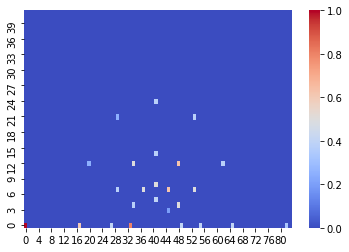

In [24]:
ax = sns.heatmap(tt,cmap=colors)
ax.invert_yaxis()

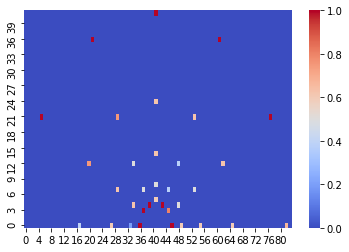

In [25]:
ax = sns.heatmap(mr,cmap=colors)
ax.invert_yaxis()

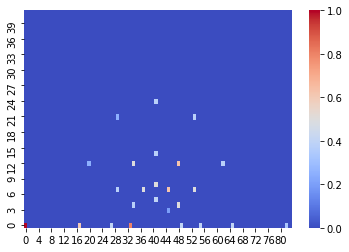

In [26]:
ax = sns.heatmap(br,cmap=colors)
ax.invert_yaxis()

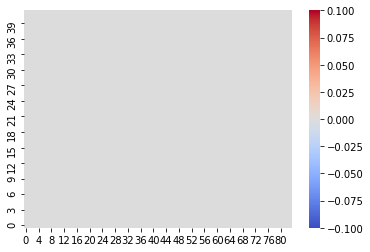

In [27]:
ax = sns.heatmap(er,cmap=colors)
ax.invert_yaxis()

Etude precise

In [28]:
def etudeResultatsDistance(br,mr):
    posDisp = calculPositionDisponiblesSP()
    res = dict()
    for dists in range(0,5):
        res[dists]=(0,0)
    for mvm,inp,pos,pos2 in br:
        if(pos != -1):
            for dists in range(0,5):
                if(pos in posDisp[dists]):
                    res[dists]=(res[dists][0]+1,res[dists][1])
                    break

    for mvm,inp,pos,pos2 in mr:
        if(pos != -1):
            for dists in range(0,5):
                if(pos in posDisp[dists]):
                    res[dists]=(res[dists][0],res[dists][1]+1)
                    break
    return res

In [29]:
etudeResultatsDistance(b,m)

{0: (3, 27), 1: (26, 24), 2: (23, 27), 3: (18, 32), 4: (4, 27)}